### Table of contents

Create a dataframe with missing values
Solutions:
     1. Deleting rows
        1.Drop rows where any cells in that row is NA
        2.Drop rows where all cells in that row is NA
        3.Drop column if they only contain missing values
        4.Drop rows that contain less than five observations(threshold)
    2(i).Replacing With Mean/Median/Mode(Manually)
        1.with zeros
        2.with mean value
        3.with median value
        4.with mode value
        5.with bfill or ffill
    2(ii).Replacing With Mean/Median/Mode(using sklearn)
    3. Predicting The Missing Values
    4. Using Algorithms Which Support Missing Values    

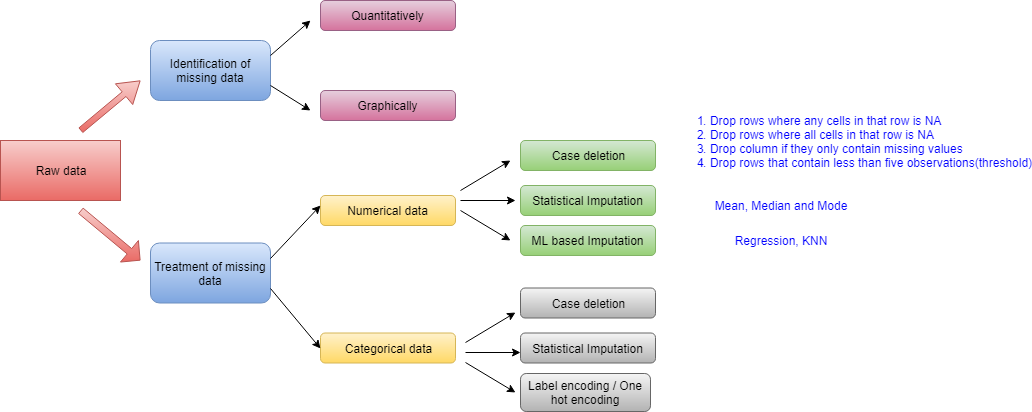

In [1]:
from IPython.display import Image
Image("C:/Users/athiq.ahmed/Desktop/Other/Python code/ML/Diagrams/Missing values/Missing values.png")

### Create dataframe with missing values

In [4]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt

In [5]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [5]:
print("The number of observations -", df.shape[0])
print("The number of columns -", df.shape[1])

The number of observations - 5
The number of columns - 6


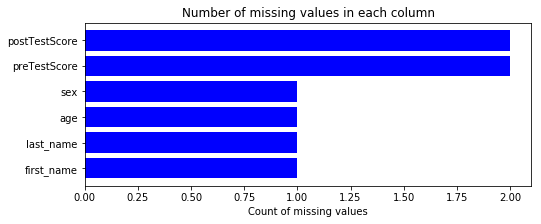

In [22]:
%matplotlib inline

missing_df = df.isnull().sum(axis=0).reset_index()
# missing_df = df.isnull().sum()
missing_df.columns = ['column_name', 'missing_count'];missing_df
missing_df = missing_df.loc[missing_df['missing_count']>0];missing_df
missing_df = missing_df.sort_values(by='missing_count');missing_df

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,3))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

### 1.Deleting Rows

This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

1. Drop rows where any cells in that row is NA
2. Drop rows where all cells in that row is NA
3. Drop column if they only contain missing values
4. Drop rows that contain less than five observations(threshold)
        
Pros:
1. Complete removal of data with missing values results in robust and highly accurate model
2. Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

Cons:
1. Loss of information and data
2. Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset

##### 1.Drop rows where any cells in that row is NA

In [92]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [24]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 2.Drop rows where all cells in that row is NA

In [25]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [26]:
# Create a new column full of missing values

df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


#####  3.Drop column if they only contain missing values

In [ ]:
df.dropna(axis=1, how='all',inplace=True)
df

##### 4.Drop rows that contain less than five observations

In [28]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### 2(i). Replacing With Mean/Median/Mode
This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.

A standard and often very good approach is to replace the missing values with mean, median or mode. For numerical values you should go with mean, and if there are some outliers try median (since it is much less sensitive to them)

It includes the following:
1. with zeros
2. with mean value
3. with median value
4. with bfill or ffill

Pros:
1. This is a better approach when the data size is small
2. It can prevent data loss which results in removal of the rows and columns

Cons:
1. Imputing the approximations add variance and bias
2. Works poorly compared to other multiple-imputations method

In [49]:
df1 = df.copy()
df1

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 1.Fill in missing data with zeros

In [50]:
df1.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 2.Fill in missing preTestScore with the mean value

In [61]:
df1 = df.copy()
df1["preTestScore"].fillna(df1["preTestScore"].mean(), inplace=True);df1

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 3.Fill in missing preTestScore with the median value

In [62]:
df1 = df.copy()
df1["preTestScore"].fillna(df1["age"].median(),inplace=True);df1

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,39.0,NaN
2,Tina,Ali,36.0,f,39.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 4.Fill in missing preTestScore with the mode value

In [57]:
df1 = df.copy()
df1["preTestScore"].fillna(df1["postTestScore"].mode(), inplace=True);df1

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,62.0,NaN
2,Tina,Ali,36.0,f,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### Fill in missing postTestScore with each sex’s mean value of postTestScore

In [63]:
df1["postTestScore"].fillna(df1.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df1

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,39.0,NaN
2,Tina,Ali,36.0,f,39.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 5.bfill means back-fill

In [64]:
df1.fillna(method='bfill')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,Tina,Ali,36.0,f,39.0,70.0
2,Tina,Ali,36.0,f,39.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


##### 6.ffill means forward-fill

In [65]:
df1.fillna(method='ffill')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,Jason,Miller,42.0,m,39.0,25.0
2,Tina,Ali,36.0,f,39.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [33]:
df2 =df.copy()
df2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### 2(ii).Replacing With Mean/Median/Mode(using sklearn)

In [34]:
from sklearn.preprocessing import Imputer
columns_to_impute = ['age', 'preTestScore','postTestScore']
my_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
df2[columns_to_impute] = my_imputer.fit_transform(df2[columns_to_impute])
df2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.0,25.000000
1,NaN,NaN,43.75,NaN,3.0,52.333333
2,Tina,Ali,36.00,f,3.0,52.333333
3,Jake,Milner,24.00,m,2.0,62.000000
4,Amy,Cooze,73.00,f,3.0,70.000000


### 3.Predicting The Missing Values

Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm.

If there exists a correlation between the variabls do not want to use "imputation" by mean, median or mode. Estimate the vairable values keeping in mind that they are related to other inputs, not just the mean

Pros:
1. Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted variable bias
2. Yields unbiased estimates of the model parameters

Cons:
1. Bias also arises when an incomplete conditioning set is used for a categorical variable
2. Considered only as a proxy for the true values

In [78]:
df1 =df.copy();df1

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [79]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [80]:
data_with_null = df1[['preTestScore','postTestScore','age']];data_with_null

,preTestScore,postTestScore,age
0,4.0,25.0,42.0
1,NaN,NaN,NaN
2,NaN,NaN,36.0
3,2.0,62.0,24.0
4,3.0,70.0,73.0


In [81]:
data_without_null = data_with_null.dropna();data_without_null

,preTestScore,postTestScore,age
0,4.0,25.0,42.0
3,2.0,62.0,24.0
4,3.0,70.0,73.0


In [82]:
train_data_x = data_without_null[['age','preTestScore']];train_data_x

,age,preTestScore
0,42.0,4.0
3,24.0,2.0
4,73.0,3.0


In [83]:
train_data_y = data_without_null[['postTestScore']];train_data_y

,postTestScore
0,25.0
3,62.0
4,70.0


In [84]:
linreg.fit(train_data_x,train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
test_data = data_without_null[['age','preTestScore']];test_data

,age,preTestScore
0,42.0,4.0
3,24.0,2.0
4,73.0,3.0


In [86]:
df1['postTestScore1'] = pd.DataFrame(linreg.predict(test_data));df1

,first_name,last_name,age,sex,preTestScore,postTestScore,postTestScore1
0,Jason,Miller,42.0,m,4.0,25.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN,62.0
2,Tina,Ali,36.0,f,NaN,NaN,70.0
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [87]:
df1.postTestScore.fillna(df1.postTestScore1,inplace=True);df1

,first_name,last_name,age,sex,preTestScore,postTestScore,postTestScore1
0,Jason,Miller,42.0,m,4.0,25.0,25.0
1,NaN,NaN,NaN,NaN,NaN,62.0,62.0
2,Tina,Ali,36.0,f,NaN,70.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [90]:
Rsquare=regr.score(train_data_x,train_data_y);
Intercept=regr.intercept_
Coeff=regr.coef_

In [91]:
print("Rsquare:%f" % Rsquare)
print("Intercept:%f" % Intercept)
# print("Coeff:%f" % Coeff)


Rsquare:-7441.220656
Intercept:-143.433962


### 5. Using Algorithms Which Support Missing Values

KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. In this particular dataset, taking into account the person’s age, sex, class etc, we will assume that people having same data for the above mentioned features will have the same kind of fare.

Unfortunately, the SciKit Learn library for the K – Nearest Neighbour algorithm in Python does not support the presence of the missing values.

Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

Pros:
1. Does not require creation of a predictive model for each attribute with missing data in the dataset
2. Correlation of the data is neglected

Cons:
1. Is a very time consuming process and it can be critical in data mining where large databases are being extracted
2. Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result

##### https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/
